In [1]:
import warnings
warnings.filterwarnings('ignore')

# Notebook to look at variations in the DDF experiments
from lsst.sims.maf.runComparison import RunComparison
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import glob



In [2]:
# Database files for runs avaialble at:  https://lsst-web.ncsa.illinois.edu/sim-data/sims_featureScheduler_runs1.4/
run_dirs = glob.glob('sci*')
run_names = [direc.replace('sci_','').replace('_v1.4_10yrs', '') for direc in run_dirs]

In [3]:
run_names

['euclidddf',
 'baseline',
 'agnddf',
 'flexddf',
 'flexddf_moreu',
 'longseasonddf',
 'darkddf',
 'descddf']

In [4]:
# ugh, RunComparison is a little bit-rotted, just load it up one at a time and merge
dfs = []
for i in range(len(run_dirs)):
    ack = RunComparison('.', [run_names[i]], rundirs=[run_dirs[i]])
    ack.addSummaryStats()
    dfs.append(ack.summaryStats)
df = pd.concat(dfs)

In [5]:
df

,fOArea fO All visits HealpixSlicer,fOArea/benchmark fO All visits HealpixSlicer,fONv MedianNvis fO All visits HealpixSlicer,fONv MinNvis fO All visits HealpixSlicer,fONv/benchmark MedianNvis fO All visits HealpixSlicer,fONv/benchmark MinNvis fO All visits HealpixSlicer,Median Parallax Error (WFD) Parallax Error @ 22.4 All visits HealpixSlicer,95th Percentile Parallax Error Parallax Error @ 22.4 All visits HealpixSlicer,Mean Parallax Error @ 22.4 All visits HealpixSlicer,Rms Parallax Error @ 22.4 All visits HealpixSlicer,...,Min Kuiper rotTelPos g HealpixSlicer,N(+3Sigma) Kuiper rotTelPos g HealpixSlicer,N(-3Sigma) Kuiper rotTelPos g HealpixSlicer,"DD:ELAISS1, r UserPointsSlicer","DD:XMM-LSS, r UserPointsSlicer","DD:ECDFS, r UserPointsSlicer","DD:COSMOS, r UserPointsSlicer","DD:290, r UserPointsSlicer","DD:EDFSa, r UserPointsSlicer","DD:EDFSb, r UserPointsSlicer"
euclidddf,18063.277832,1.003515,900.0,831.0,1.090909,1.007273,2.112491,11.522326,4.862631,16.429611,...,0.0,26.0,208.0,28.719480,28.651405,28.723174,28.576795,26.405565,28.110269,28.112411
baseline,18089.295935,1.004961,900.0,833.0,1.090909,1.009697,2.098712,11.527232,4.948320,18.555554,...,0.0,11.0,185.0,28.814872,28.709241,28.741748,28.632392,28.604263,27.060737,27.073922
agnddf,18170.707419,1.009484,943.0,876.0,1.143030,1.061818,2.031386,11.324329,4.671884,15.318050,...,0.0,27.0,187.0,27.643257,27.545123,27.687215,27.451828,27.387858,27.105109,27.102525
flexddf,18166.510951,1.009251,946.0,876.0,1.146667,1.061818,2.049690,11.421238,4.688597,13.922934,...,0.0,17.0,197.0,28.641332,28.529593,28.597835,28.497021,26.460080,27.989533,27.999772
flexddf_moreu,18173.225300,1.009624,944.0,875.0,1.144242,1.060606,2.043479,11.118741,4.767962,22.397363,...,0.0,22.0,173.0,28.673513,28.576514,28.648234,28.519757,26.526196,28.025462,28.037336
longseasonddf,18167.350244,1.009297,945.0,875.0,1.145455,1.060606,2.044866,11.511067,4.657367,14.440649,...,0.0,15.0,219.0,28.513287,28.352698,28.581182,28.298080,26.472382,27.895060,27.888941
darkddf,18159.796601,1.008878,938.0,870.0,1.136970,1.054545,2.063408,11.290428,4.724982,14.802864,...,0.0,15.0,200.0,28.598336,28.540086,28.606030,28.483021,26.422204,28.211950,28.201906
descddf,18163.993070,1.009111,934.0,867.0,1.132121,1.050909,2.049519,11.539237,4.692300,12.786913,...,0.0,21.0,202.0,28.018060,27.949782,28.194131,28.105311,27.679127,27.086302,27.102000


In [6]:
ddf_cols = [col.split(' ')[0].split(',')[0] for col in df.columns if 'DD' in col]
ddf_names = np.unique(ddf_cols)
ddf_names

array(['DD:290', 'DD:COSMOS', 'DD:ECDFS', 'DD:EDFSa', 'DD:EDFSb',
       'DD:ELAISS1', 'DD:XMM-LSS'], dtype='<U10')

In [7]:
def comp_runs(df, colnames, units='', ylabel=None, labels=None, alpha=1):
    filter2color = {'u': 'purple', 'g': 'blue', 'r': 'green',
                             'i': 'cyan', 'z': 'orange', 'y': 'red'}
    f, ax = plt.subplots()
    if ylabel is None:
        ylabel = colnames[0]
    x = np.arange(df.shape[0])
    ticks = df.index.values.tolist()
    for i,colname in enumerate(colnames):
        if labels is not None:
            label = labels[i]
            if label in filter2color.keys():
                color = filter2color[label]
            else:
                color = ''
        else:
            label = None
            color = ''
        ax.plot(x, df[colname], '%s' % color, marker='o', label=label, alpha=alpha)
    ax.set_ylabel(ylabel+' ('+units+')')
    ax.set_xticks(x)
    ax.set_xticklabels(ticks, rotation=90)
    if labels is not None:
        ax.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)
    return f, ax

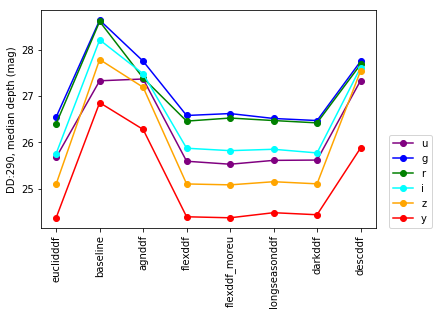

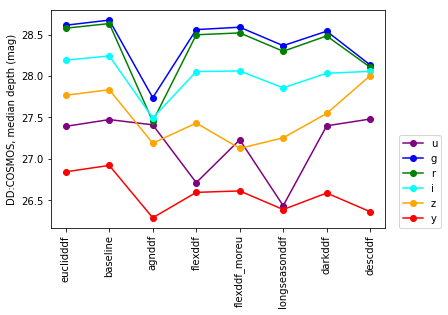

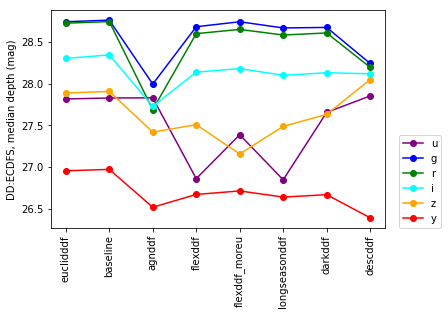

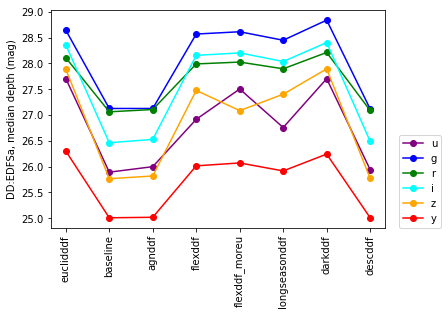

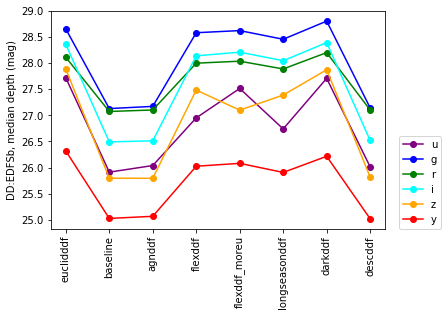

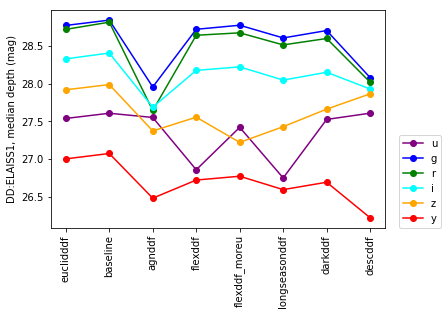

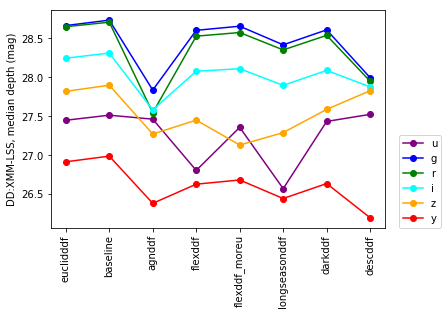

In [8]:
for ddf in ddf_names:
    colnames = ['%s, %s  UserPointsSlicer' % (ddf, filtername) for filtername in 'ugrizy']

    #ylabel = ack.headerStats[column]
    f, a = comp_runs(df, colnames, labels='ugrizy', ylabel='%s, median depth' % ddf, units='mag')
    filename = 'depths_%s.png' % ddf
    filename = filename.replace(':', '.')
    f.savefig(filename, bbox_inches = 'tight')

In [9]:
ddf_names

array(['DD:290', 'DD:COSMOS', 'DD:ECDFS', 'DD:EDFSa', 'DD:EDFSb',
       'DD:ELAISS1', 'DD:XMM-LSS'], dtype='<U10')

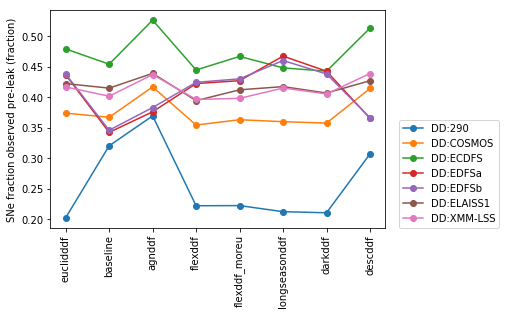

In [10]:
columns = ['%s SNIa_PrePeak  UserPointsSlicer' % ddf for ddf in ddf_names]
f, a = comp_runs(df, columns, labels=ddf_names, units='fraction', ylabel='SNe fraction observed pre-leak')
f.savefig('sne_pre_peak.png', bbox_inches = 'tight')

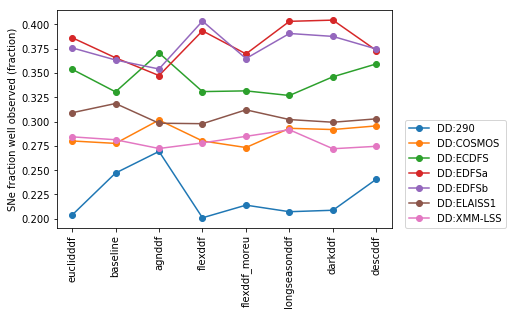

In [11]:
columns = ['%s SNIa_WellSampled  UserPointsSlicer' % ddf for ddf in ddf_names]
f, a = comp_runs(df, columns, labels=ddf_names, units='fraction', ylabel='SNe fraction well observed')
f.savefig('sne_well.png', bbox_inches = 'tight')

In [12]:
[col for col in df.columns if 'SN' in col]

['SNIa_Detected  UserPointsSlicer',
 'SNIa_Nobs  UserPointsSlicer',
 'SNIa_PrePeak  UserPointsSlicer',
 'SNIa_WellSampled  UserPointsSlicer',
 'DD:ELAISS1 SNIa_Detected  UserPointsSlicer',
 'DD:ELAISS1 SNIa_Nobs  UserPointsSlicer',
 'DD:ELAISS1 SNIa_PrePeak  UserPointsSlicer',
 'DD:ELAISS1 SNIa_WellSampled  UserPointsSlicer',
 'DD:XMM-LSS SNIa_Detected  UserPointsSlicer',
 'DD:XMM-LSS SNIa_Nobs  UserPointsSlicer',
 'DD:XMM-LSS SNIa_PrePeak  UserPointsSlicer',
 'DD:XMM-LSS SNIa_WellSampled  UserPointsSlicer',
 'DD:ECDFS SNIa_Detected  UserPointsSlicer',
 'DD:ECDFS SNIa_Nobs  UserPointsSlicer',
 'DD:ECDFS SNIa_PrePeak  UserPointsSlicer',
 'DD:ECDFS SNIa_WellSampled  UserPointsSlicer',
 'DD:COSMOS SNIa_Detected  UserPointsSlicer',
 'DD:COSMOS SNIa_Nobs  UserPointsSlicer',
 'DD:COSMOS SNIa_PrePeak  UserPointsSlicer',
 'DD:COSMOS SNIa_WellSampled  UserPointsSlicer',
 'DD:290 SNIa_Detected  UserPointsSlicer',
 'DD:290 SNIa_Nobs  UserPointsSlicer',
 'DD:290 SNIa_PrePeak  UserPointsSlicer',
 '

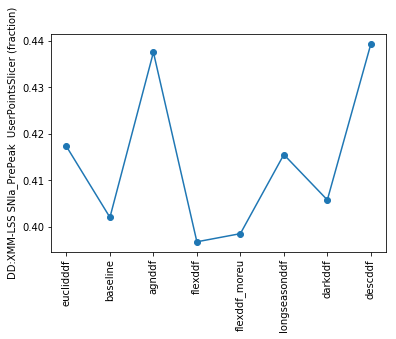

In [13]:

column = 'DD:XMM-LSS SNIa_PrePeak  UserPointsSlicer'
ylabel = ack.headerStats[column]
f, a = comp_runs(df, [column], labels=None, units='fraction')

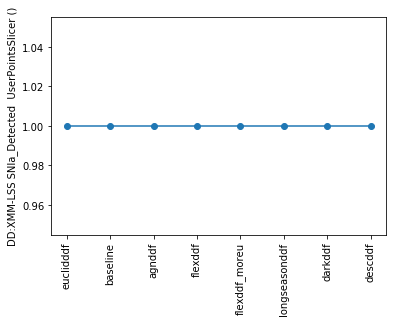

In [14]:
column = 'DD:XMM-LSS SNIa_Detected  UserPointsSlicer'
ylabel = ack.headerStats[column]
f, a = comp_runs(df, [column])

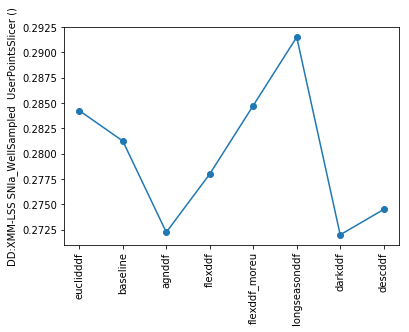

In [15]:
column = 'DD:XMM-LSS SNIa_WellSampled  UserPointsSlicer'
f, a = comp_runs(df, [column])

In [16]:
dd_cols = [col for col in df.columns if 'DD:XMM-LSS' in col]
dd_cols

['DD:XMM-LSS SNIa_Detected  UserPointsSlicer',
 'DD:XMM-LSS SNIa_Nobs  UserPointsSlicer',
 'DD:XMM-LSS SNIa_PrePeak  UserPointsSlicer',
 'DD:XMM-LSS SNIa_WellSampled  UserPointsSlicer',
 'DD:XMM-LSS, i  UserPointsSlicer',
 'DD:XMM-LSS, y  UserPointsSlicer',
 'DD:XMM-LSS, g  UserPointsSlicer',
 'DD:XMM-LSS, u  UserPointsSlicer',
 'DD:XMM-LSS, z  UserPointsSlicer',
 'DD:XMM-LSS, r  UserPointsSlicer']

In [17]:
ack.headerStats

,fOArea fO All visits HealpixSlicer,fOArea/benchmark fO All visits HealpixSlicer,fONv MedianNvis fO All visits HealpixSlicer,fONv MinNvis fO All visits HealpixSlicer,fONv/benchmark MedianNvis fO All visits HealpixSlicer,fONv/benchmark MinNvis fO All visits HealpixSlicer,95th Percentile Parallax Error Parallax Error @ 22.4 All visits HealpixSlicer,Max Parallax Error @ 22.4 All visits HealpixSlicer,Mean Parallax Error @ 22.4 All visits HealpixSlicer,Median Parallax Error (WFD) Parallax Error @ 22.4 All visits HealpixSlicer,...,N(+3Sigma) Kuiper rotTelPos g HealpixSlicer,N(-3Sigma) Kuiper rotTelPos g HealpixSlicer,Rms Kuiper rotTelPos g HealpixSlicer,"DD:ELAISS1, r UserPointsSlicer","DD:XMM-LSS, r UserPointsSlicer","DD:ECDFS, r UserPointsSlicer","DD:COSMOS, r UserPointsSlicer","DD:290, r UserPointsSlicer","DD:EDFSa, r UserPointsSlicer","DD:EDFSb, r UserPointsSlicer"
BaseName,fO All visits HealpixSlicer,fO All visits HealpixSlicer,fO All visits HealpixSlicer,fO All visits HealpixSlicer,fO All visits HealpixSlicer,fO All visits HealpixSlicer,Parallax Error @ 22.4 All visits HealpixSlicer,Parallax Error @ 22.4 All visits HealpixSlicer,Parallax Error @ 22.4 All visits HealpixSlicer,Parallax Error @ 22.4 All visits HealpixSlicer,...,Kuiper rotTelPos g HealpixSlicer,Kuiper rotTelPos g HealpixSlicer,Kuiper rotTelPos g HealpixSlicer,"DD:ELAISS1, r UserPointsSlicer","DD:XMM-LSS, r UserPointsSlicer","DD:ECDFS, r UserPointsSlicer","DD:COSMOS, r UserPointsSlicer","DD:290, r UserPointsSlicer","DD:EDFSa, r UserPointsSlicer","DD:EDFSb, r UserPointsSlicer"
MetricName,fO,fO,fO,fO,fO,fO,Parallax Error @ 22.4,Parallax Error @ 22.4,Parallax Error @ 22.4,Parallax Error @ 22.4,...,Kuiper rotTelPos,Kuiper rotTelPos,Kuiper rotTelPos,"DD:ELAISS1, r","DD:XMM-LSS, r","DD:ECDFS, r","DD:COSMOS, r","DD:290, r","DD:EDFSa, r","DD:EDFSb, r"
MetricMetadata,All visits,All visits,All visits,All visits,All visits,All visits,All visits,All visits,All visits,All visits,...,g,g,g,,,,,,,
SlicerName,HealpixSlicer,HealpixSlicer,HealpixSlicer,HealpixSlicer,HealpixSlicer,HealpixSlicer,HealpixSlicer,HealpixSlicer,HealpixSlicer,HealpixSlicer,...,HealpixSlicer,HealpixSlicer,HealpixSlicer,UserPointsSlicer,UserPointsSlicer,UserPointsSlicer,UserPointsSlicer,UserPointsSlicer,UserPointsSlicer,UserPointsSlicer
SummaryName,fOArea,fOArea/benchmark,fONv MedianNvis,fONv MinNvis,fONv/benchmark MedianNvis,fONv/benchmark MinNvis,95th Percentile Parallax Error,Max,Mean,Median Parallax Error (WFD),...,N(+3Sigma),N(-3Sigma),Rms,"median depth DD:ELAISS1, r","median depth DD:XMM-LSS, r","median depth DD:ECDFS, r","median depth DD:COSMOS, r","median depth DD:290, r","median depth DD:EDFSa, r","median depth DD:EDFSb, r"


In [18]:
ack.headerStats[df.columns[-2]]['SummaryName']

'median depth DD:EDFSa, r'

## Now to look at the stats from glance

In [19]:
# Now to do the stuff computed in glance
dfs = []
for i in range(len(run_dirs)):
    ack = RunComparison('.', [run_names[i]], rundirs=[run_names[i]+'_v1.4_10yrs'])
    ack.addSummaryStats()
    dfs.append(ack.summaryStats)
df = pd.concat(dfs)
df.fillna(value=0, inplace=True)

In [20]:
dd = [col for col in df.columns if 'DD' in col]
ddf_names = np.unique([col.replace('Counts_', '').replace('Percents_', '').replace('u,','') for col in dd])

In [21]:

ddf_names

array(['DD:290', 'DD:COSMOS', 'DD:ECDFS', 'DD:EDFS', 'DD:EDFS1',
       'DD:EDFS2', 'DD:ELAISS1', 'DD:XMM-LSS'], dtype='<U10')

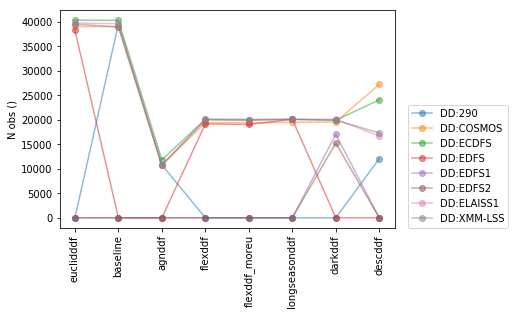

In [22]:
columns = ['Counts_%s' % ddf for ddf in ddf_names]

f, a = comp_runs(df, columns, labels=ddf_names, ylabel='N obs', alpha=0.5)
f.savefig('nobs.png', bbox_inches = 'tight')

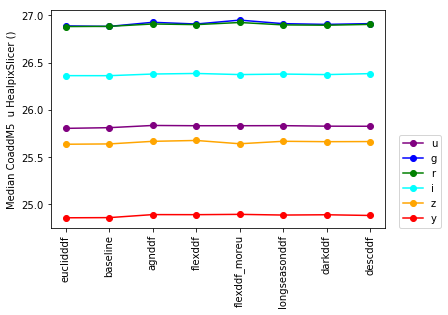

In [23]:

# XXX make this colorful
columns = ['Median CoaddM5  %s HealpixSlicer' % filtername for filtername in 'ugrizy']

f, a = comp_runs(df, columns, labels='ugrizy')
f.savefig('survey_depth.png', bbox_inches = 'tight')

In [24]:
# Let's make a normalized median 
for filtername in 'ugrizy':
    df['Median CoaddM5 - baseline, %s' % filtername] =  df['Median CoaddM5  %s HealpixSlicer' % filtername]- df['Median CoaddM5  %s HealpixSlicer' % filtername]['baseline']

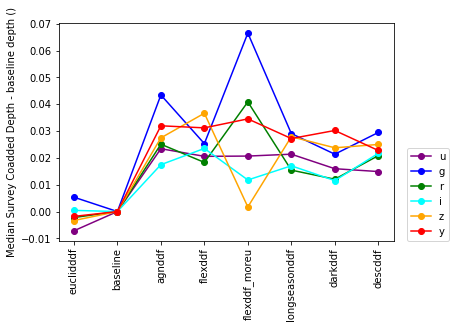

In [25]:
columns = ['Median CoaddM5 - baseline, %s' % filtername for filtername in 'ugrizy']

f, a = comp_runs(df, columns, labels='ugrizy', ylabel='Median Survey Coadded Depth - baseline depth')
f.savefig('survey_depth_rel.png', bbox_inches = 'tight')